In [1]:
import numpy as np
import pandas as pd

import glob
import os
import matplotlib.pyplot as plt


In [3]:

all_files = glob.glob("./TestResults/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [4]:
def timedelta_to_microseconds(delta):
    return delta.days * 24 * 3600 * 1e6 + delta.seconds * 1e6 + delta.microseconds

In [15]:
#Filter for only correctness
frame = frame[frame['TestResult.DisplayName'].str.contains('\(correctness\)')]

directFrame = frame[frame['TestResult.DisplayName'].str.contains('soundDirect')]
monadicFrame = frame[frame['TestResult.DisplayName'].str.contains('soundMonadic')]
bidirFrame = frame[frame['TestResult.DisplayName'].str.contains('soundBidir')]
semanticFrame = frame[frame['TestResult.DisplayName'].str.contains('soundSemantic')]

directFrame['TestResult.Duration'] = pd.to_timedelta(directFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
monadicFrame['TestResult.Duration'] = pd.to_timedelta(monadicFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
bidirFrame['TestResult.Duration'] = pd.to_timedelta(bidirFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
semanticFrame['TestResult.Duration'] = pd.to_timedelta(semanticFrame['TestResult.Duration']).apply(timedelta_to_microseconds)

/var/folders/rj/yzfg8y3s62x51yphd1_qtjxm0000gq/T/ipykernel_62038/2396411842.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directFrame['TestResult.Duration'] = pd.to_timedelta(directFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
/var/folders/rj/yzfg8y3s62x51yphd1_qtjxm0000gq/T/ipykernel_62038/2396411842.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monadicFrame['TestResult.Duration'] = pd.to_timedelta(monadicFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
/var/fold

In [9]:
semanticFrame

,TestResult.DisplayName,TestResult.Outcome,TestResult.Duration,TestResult.ResourceCount


680358.97
7.361489267946085


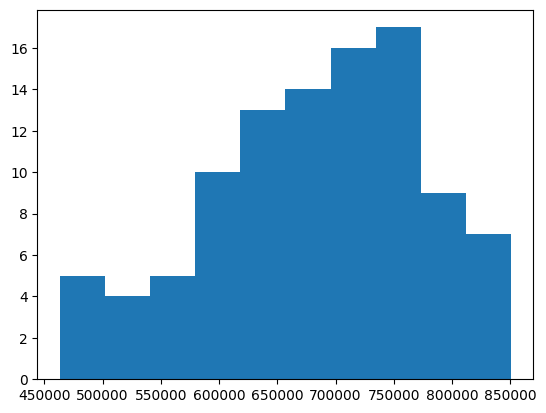

In [21]:
plt.hist(directFrame['TestResult.Duration'])
print(directFrame['TestResult.Duration'].mean()) 
print(directFrame['TestResult.Duration'].mean() / directFrame['TestResult.Duration'].std())


730119.94
7.434733393132061


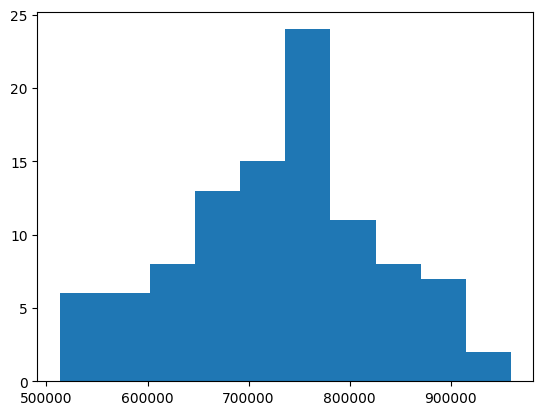

In [20]:
plt.hist(monadicFrame['TestResult.Duration'])
print(monadicFrame['TestResult.Duration'].mean())
print(monadicFrame['TestResult.Duration'].mean() / monadicFrame['TestResult.Duration'].std())

In [ ]:
frame

973588.33
141784.50897668154


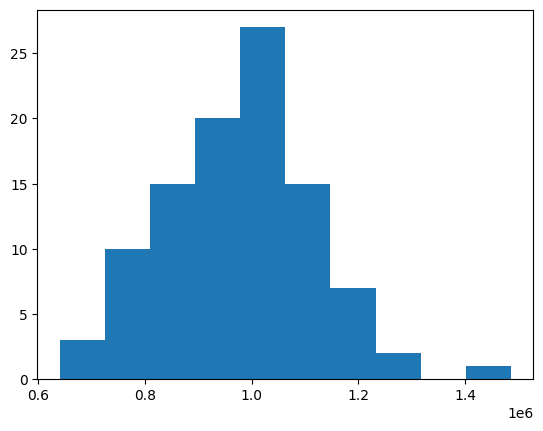

In [29]:
plt.hist(bidirFrame['TestResult.Duration'])
print(bidirFrame['TestResult.Duration'].mean())
print(bidirFrame['TestResult.Duration'].std())

711456.44
121945.58789077475


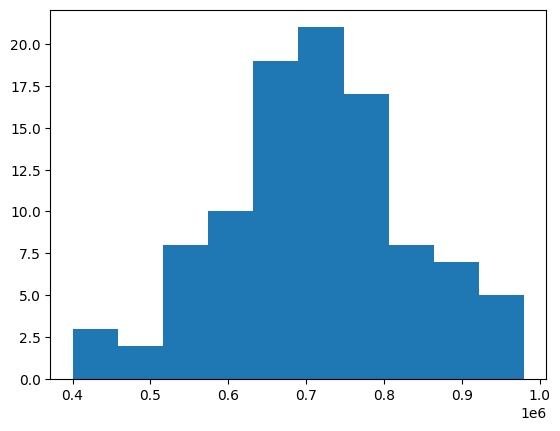

In [28]:
plt.hist(semanticFrame['TestResult.Duration'])
print(semanticFrame['TestResult.Duration'].mean())
print(semanticFrame['TestResult.Duration'].std())